<a href="https://colab.research.google.com/github/I-AM-PRASHANT-VERMA/Almabetter-Machine-Learning-capstone-project/blob/main/machine_learning_DS601_Mid_Course_Summative_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**
# Dataset Description
https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction

This dataset offers a variety of attributes valuable for comprehensive analysis. It contains 555,719 instances and 22 attributes, a mix of categorical and numerical data types. Importantly, the dataset is complete with no null values. Here's a breakdown of the attributes:

1. Trans_date_trans_time: Timestamp of the transaction (date and time).

2. Cc_num:Unique customer identification number.

3. MerchantThe merchant involved in the transaction.

4. Category Transaction type (e.g., personal, childcare).

5. Amt:Transaction amount.

6. First: Cardholder's first name.

7. Last Cardholder's last name.

8. Gender: Cardholder's gender.

9. Street: Cardholder's street address.

10. City: Cardholder's city of residence.

11. State: Cardholder's state of residence.

12. Zip: Cardholder's zip code.

13. Lat:Latitude of cardholder's location.

14. Long: Longitude of cardholder's location.

15. City_pop:Population of the cardholder's city.

16. Job:Cardholder's job title.

17. Dob: Cardholder's date of birth.

18. Trans_num: Unique transaction identifier.

19. Unix_time: Transaction timestamp (Unix format).

20. Merch_lat:Merchant's location (latitude).

21. Merch_long: Merchant's location (longitude).

22. Is_fraud:Fraudulent transaction indicator (1 = fraud, 0 = legitimate).
This is the target variable for classification purposes.

**Problem Statement:**
The objective is to develop a machine learning solution to detect fraudulent transactions in the financial sector. This is a supervised learning problem, where the goal is to classify transactions as either fraudulent (1) or legitimate (0) based on various features associated with each transaction.

The financial sector faces significant challenges in identifying and preventing fraudulent transactions, which can result in substantial financial losses and undermine customer trust. Traditional rule-based systems for fraud detection may lack the flexibility and scalability needed to adapt to evolving fraud patterns. Therefore, there is a need for advanced machine learning algorithms capable of detecting fraudulent activities in real-time while minimizing false positives.

The solution to this problem involves collecting and preprocessing transaction data, identifying relevant features, training machine learning models, and deploying a fraud detection system capable of accurately predicting fraudulent transactions. By leveraging historical transaction data and utilizing advanced modeling techniques, the aim is to develop a robust fraud detection system that can effectively identify suspicious activities and mitigate financial risks for financial institutions and customers alike.

Understanding the industry and categorizing the type of problem is crucial for framing the context of the machine learning project. In the context of fraud detection in the financial sector, the type of problem is typically classified as a supervised learning problem.

**Supervised Learning:**
1. **Definition:** Supervised learning involves training a model on a labeled dataset, where each data point is associated with a corresponding target variable or label. The goal is to learn a mapping from input features to the target variable, enabling the model to make predictions on unseen data.
  
2. **Application to Fraud Detection:** In the case of fraud detection, historical transaction data is labeled as either fraudulent or legitimate. These labels serve as the target variable for training a supervised learning model. The model learns patterns and relationships in the data to distinguish between fraudulent and legitimate transactions, allowing it to classify new transactions as they occur.

3. **Benefits:** Supervised learning offers several advantages for fraud detection:
   - It leverages labeled data to train models, enabling them to learn from past instances of fraud.
   - Supervised models can generalize well to unseen data, provided the training data is representative of the underlying distribution.
   - Various evaluation metrics, such as accuracy, precision, recall, and F1-score, can be used to assess the performance of supervised models.

4. **Challenges:** Despite its advantages, supervised learning for fraud detection also presents challenges:
   - Imbalanced datasets, where fraudulent transactions are rare compared to legitimate ones, can lead to biased models and inaccurate predictions.
   - Adversarial attacks and evolving fraud patterns require continuous monitoring and updating of supervised models to maintain effectiveness.
   - Feature engineering and selection play a critical role in building robust models that capture relevant patterns in the data.

By understanding the industry context and categorizing the problem as a supervised learning task, data scientists can choose appropriate algorithms, evaluation metrics, and preprocessing techniques to develop effective fraud detection systems. Additionally, they can explore advanced techniques such as ensemble learning, anomaly detection, and deep learning to enhance the performance and adaptability of their models.

In [ ]:
!pip install dtreeviz

In [ ]:
# Importing common libraries
import numpy as np #for handling arrays
import pandas as pd #for data manipulation, read_excel
from numpy import math

%matplotlib inline
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns; sns.set()
import seaborn as sns #for better visualizations
from scipy import stats
from datetime import datetime
from pylab import rcParams

from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

import warnings
warnings.filterwarnings('ignore')

<ipython-input-7-2c24cac4722a>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/fraud test.csv')

In [ ]:
df.shape

(555719, 23)

shape of our dataset is (555719, 23) that means we have 555719 number of rows and 23 columns

# **Data Inspection**

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,31/12/2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,13/02/1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,31/12/2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,27/12/1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,31/12/2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,29/11/1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,31/12/2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,15/12/1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,31/12/2020 23:59,4.170690e+15,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,10/05/1993,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [ ]:
# checking for null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

<Axes: >

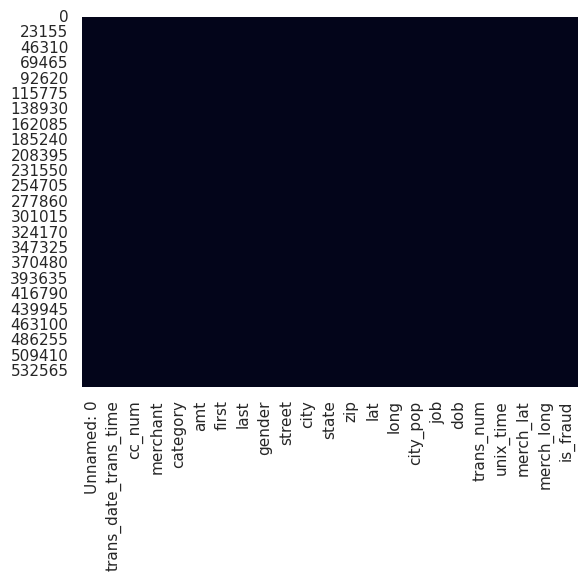

In [ ]:
# checking Null value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

Here we dont have any null values.

In [ ]:
# Columns and data types
print("Columns and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,float64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


The dataset contains various attributes with different data types. Some key attributes include transaction date and time, customer identification number, merchant details, transaction category, transaction amount, customer demographics (first name, last name, gender), address information (street, city, state, zip code), geographic coordinates, city population, job title, date of birth, transaction number, Unix timestamp, merchant location coordinates, and a binary indicator for fraudulent transactions.

In [ ]:
#column names
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
# figuring data types
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
# categorical columns
categorical_columns=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [ ]:
# find unique values of categorical column to check if there is any value which can be consider as null value or anomalie
def unique_name_no(col):
  print(df[col].unique())
  print(df[col].nunique())


for i in categorical_columns:
  print(i.upper())
  unique_name_no(i)

TRANS_DATE_TRANS_TIME
['21/06/2020 12:14' '21/06/2020 12:15' '21/06/2020 12:16' ...
 '31/12/2020 23:57' '31/12/2020 23:58' '31/12/2020 23:59']
226976
MERCHANT
['fraud_Kirlin and Sons' 'fraud_Sporer-Keebler'
 'fraud_Swaniawski, Nitzsche and Welch' 'fraud_Haley Group'
 'fraud_Johnston-Casper' 'fraud_Daugherty LLC' 'fraud_Romaguera Ltd'
 'fraud_Reichel LLC' 'fraud_Goyette, Howell and Collier'
 'fraud_Kilback Group' 'fraud_Feil, Hilpert and Koss'
 'fraud_Gottlieb Group' 'fraud_Connelly-Carter' 'fraud_Bechtelar-Rippin'
 'fraud_Lubowitz-Walter' 'fraud_Welch, Rath and Koepp'
 'fraud_Hickle Group' 'fraud_Lang, Towne and Schuppe'
 'fraud_Morissette LLC' 'fraud_Prosacco LLC' 'fraud_Corwin-Romaguera'
 'fraud_Tillman LLC' 'fraud_Veum-Koelpin'
 'fraud_Watsica, Haag and Considine' 'fraud_Leannon-Ward'
 'fraud_Hintz, Bauch and Smith' 'fraud_Labadie LLC'
 'fraud_Eichmann, Hayes and Treutel' 'fraud_Leffler-Goldner'
 'fraud_Kautzer and Sons' 'fraud_Ernser-Feest'
 'fraud_Zemlak, Tillman and Cremin' 'frau

In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.0,NaN,NaN,NaN,277859.0,160422.401459,0.0,138929.5,277859.0,416788.5,555718.0
trans_date_trans_time,555719,226976,15/12/2020 21:26,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_num,555719.0,NaN,NaN,NaN,417838748319872960.0,1309836798478910464.0,60416207185.0,180043000000000.0,3521420000000000.0,4635330000000000.0,4992350000000000000.0
merchant,555719,693,fraud_Kilback LLC,1859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,555719,14,gas_transport,56370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt,555719.0,NaN,NaN,NaN,69.39281,156.745941,1.0,9.63,47.29,83.01,22768.11
first,555719,341,Christopher,11443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,555719,471,Smith,12146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,555719,2,F,304886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,555719,924,444 Robert Mews,1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

In [ ]:
# duplicate
len(df[df.duplicated()])

0

In [ ]:
#checking null values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Unnamed: 0               0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

In [ ]:
data_df = df.copy()

In [ ]:
data_df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
data_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
data_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
trans_date_trans_time,555719,226976,15/12/2020 21:26,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_num,555719.0,NaN,NaN,NaN,417838748319872960.0,1309836798478910464.0,60416207185.0,180043000000000.0,3521420000000000.0,4635330000000000.0,4992350000000000000.0
merchant,555719,693,fraud_Kilback LLC,1859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,555719,14,gas_transport,56370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt,555719.0,NaN,NaN,NaN,69.39281,156.745941,1.0,9.63,47.29,83.01,22768.11
first,555719,341,Christopher,11443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,555719,471,Smith,12146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,555719,2,F,304886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,555719,924,444 Robert Mews,1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,555719,849,Birmingham,2423,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Calculate the number of unique values for each variable in the dataset
unique_values = data_df.nunique()

# Print the number of unique values for each variable
print(unique_values)


trans_date_trans_time    226976
cc_num                      904
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64


In [ ]:
import pandas as pd

# Convert the 'trans_date_trans_time' column to datetime format
data_df['trans_date_trans_time'] = pd.to_datetime(data_df['trans_date_trans_time'])

# Check the updated data types
print(data_df.dtypes)


trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object


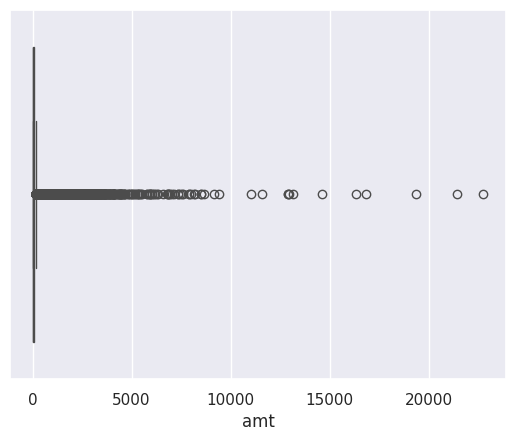

In [ ]:
# Create a boxplot to visualize the distribution of 'price' values

sns.boxplot(x="amt", data=data_df)
plt.show()


# There could be outlier present in the amt coloumn

In [ ]:
# Dealing with outliers in the 'price' column

# Define a condition to filter prices greater than or equal to the 5th percentile
cond1 = (data_df['amt'] >= data_df['amt'].quantile(0.05))

# Define a condition to filter prices less than or equal to the 95th percentile
cond2 = (data_df['amt'] <= data_df['amt'].quantile(0.95))

# Apply both conditions to filter the DataFrame and remove outliers
data_df = data_df[cond1 & cond2]


In [ ]:
# Generate and display descriptive statistics for the 'price' column
price_stats_transposed = data_df[['amt']].describe().round(2).T
price_stats_transposed


,count,mean,std,min,25%,50%,75%,max
amt,500277.0,53.17,43.46,2.43,12.04,47.28,78.49,193.05


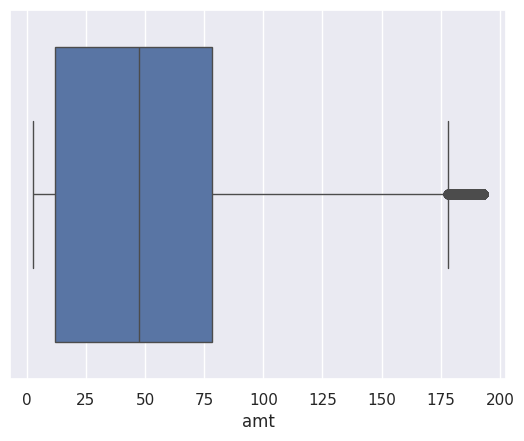

In [ ]:
# Create a boxplot to visualize the distribution of 'price' values
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="amt", data=data_df)
plt.show()


Outliers in the 'amt' column were addressed by filtering prices greater than or equal to the 5th percentile and less than or equal to the 95th percentile, effectively removing extreme values from the dataset.

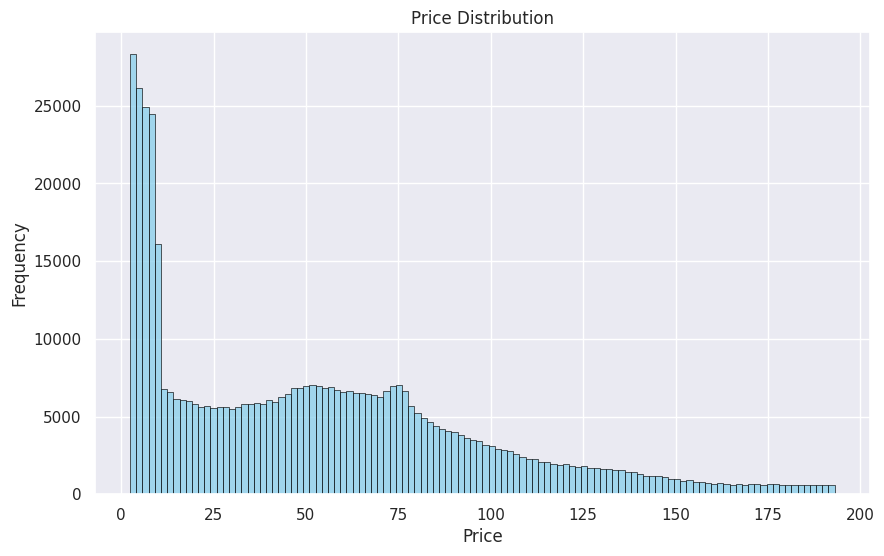

In [ ]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram for the 'price' column
sns.histplot(data=data_df, x='amt', color='skyblue', edgecolor='black')

# Customize the plot labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')

# Show the plot
plt.show()


A histogram was created to visualize the distribution of prices in the dataset. The plot depicts the frequency of prices using blue bars with black edges, highlighting the distribution of price values.Price from 0 to 15 are on transaction are on higher side whereas from 15 to 100 price we see around 5000 transactions

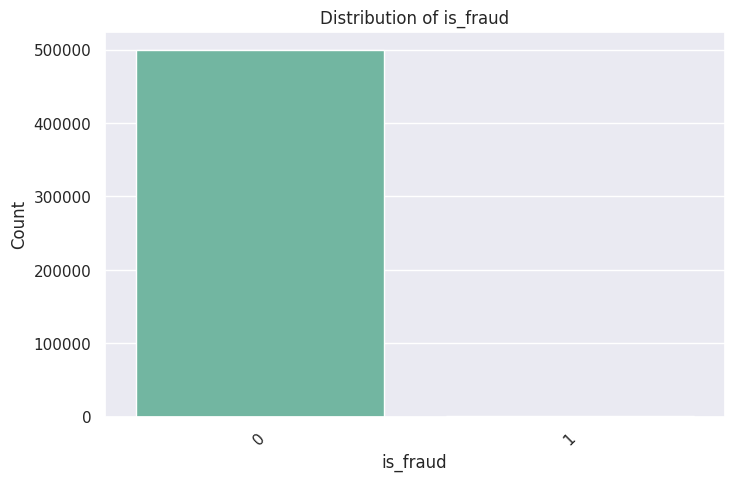

In [ ]:

# Calculate the count of each unique room type in the 'room_type' column
room_type_counts = data_df['is_fraud'].value_counts()

# Create a new Matplotlib figure with a specified size (8 inches wide, 5 inches tall)
plt.figure(figsize=(8, 5))

# Create a bar chart using Seaborn's 'barplot' function:
# - 'x' specifies the data for the x-axis
# - 'y' specifies the data for the y-axis
# - 'palette' sets the color palette for the bars (in this case, "Set2" is used)
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette="Set2")

# Add labels and a title to the plot
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.title('Distribution of is_fraud')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Display the plot on the screen
plt.show()


A bar chart was generated to illustrate the distribution of the `is_fraud` variable in the dataset. The plot showcases the count of fraudulent (1) 530 and legitimate (0) 499747 transactions. The x-axis represents the `is_fraud` categories, while the y-axis indicates the corresponding count.

In [ ]:
fraud_counts = data_df['is_fraud'].value_counts()
print(fraud_counts)



0    499747
1       530
Name: is_fraud, dtype: int64


# so the value of fraud is very less in this situation we need to scale it.

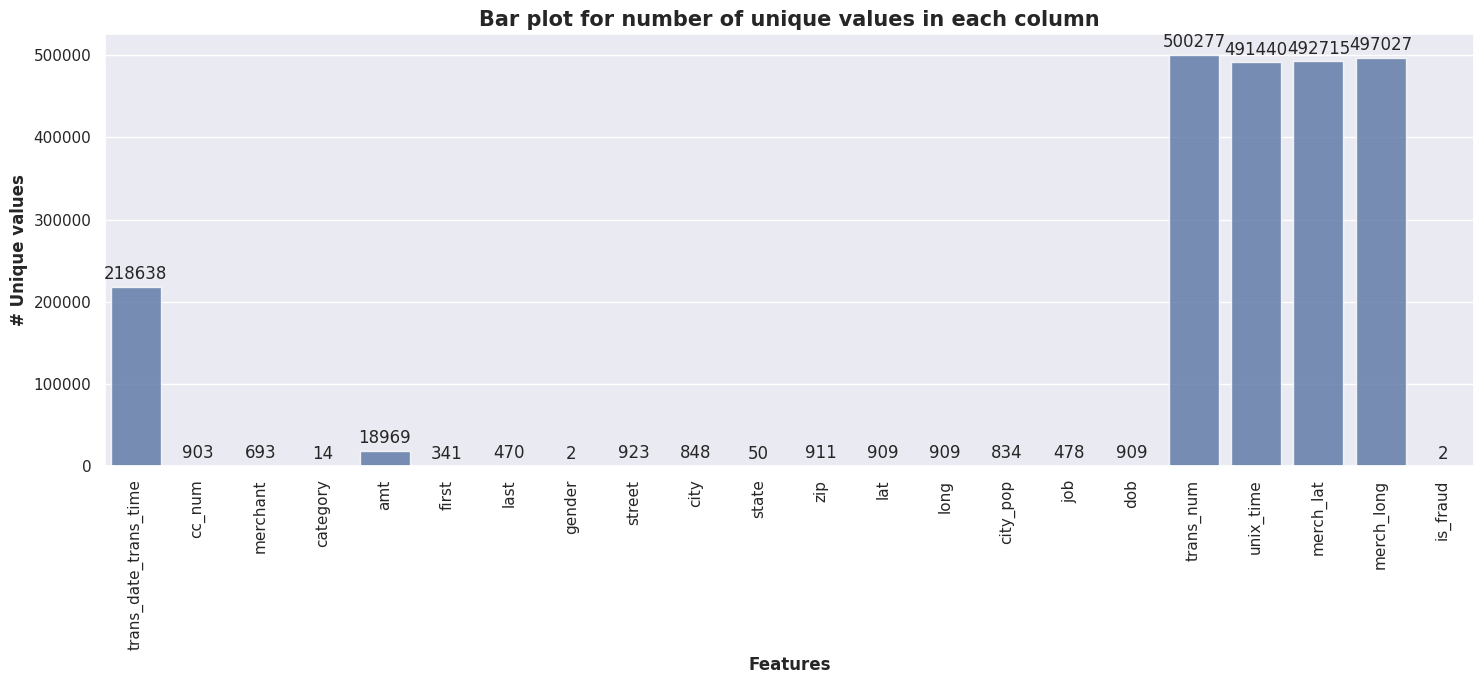

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Counting unique value of features
unique_df = pd.DataFrame()
unique_df['Features'] = data_df.columns
unique = []
for i in data_df.columns:
    unique.append(data_df[i].nunique())
unique_df['Uniques'] = unique

# Plotting the bar plot
plt.figure(figsize=(15, 7))
splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.title('Bar plot for number of unique values in each column', weight='bold', size=15)
plt.ylabel('# Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


A bar plot was generated to visualize the number of unique values in each column of the dataset. Each bar represents a feature, and its height indicates the count of unique values present in that feature. The x-axis displays the feature names, while the y-axis represents the number of unique values. The bars are labeled with the exact count of unique values for clarity. The plot is titled "Bar plot for number of unique values in each column," and appropriate labels are provided for both axes.

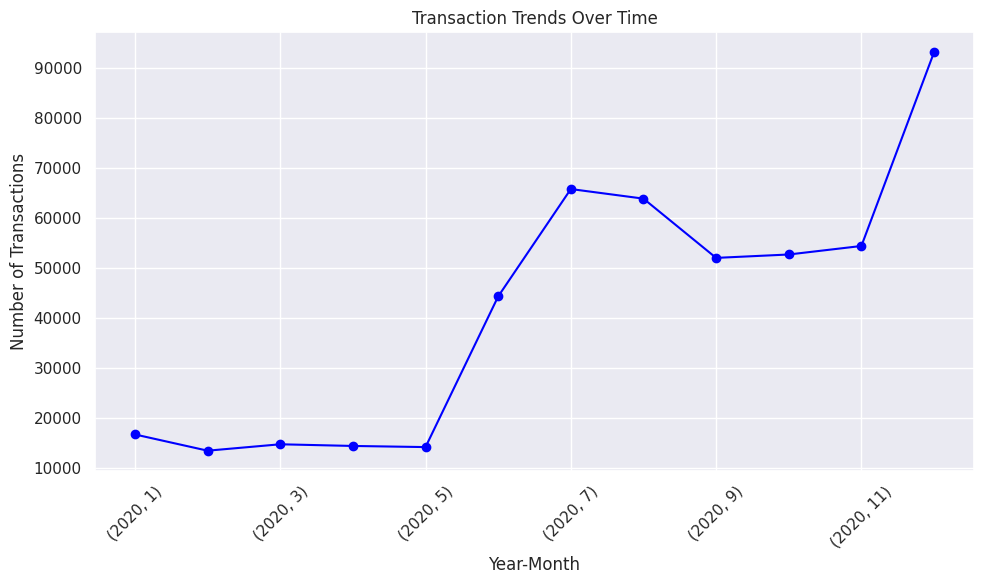

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Trans_date_trans_time' column to datetime data type
data_df['trans_date_trans_time'] = pd.to_datetime(data_df['trans_date_trans_time'])

# Extract relevant time components
data_df['Year'] = data_df['trans_date_trans_time'].dt.year
data_df['Month'] = data_df['trans_date_trans_time'].dt.month
data_df['Day'] = data_df['trans_date_trans_time'].dt.day
data_df['Hour'] = data_df['trans_date_trans_time'].dt.hour

# Group the data by year and month and count the number of transactions
transaction_counts = data_df.groupby(['Year', 'Month']).size()

# Visualize transaction trends over time
plt.figure(figsize=(10, 6))
transaction_counts.plot(kind='line', marker='o', color='blue')
plt.title('Transaction Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


1. Converts the 'Trans_date_trans_time' column to datetime data type using the `pd.to_datetime()` function.
2. Extracts relevant time components such as year, month, day, and hour from the datetime column and creates new columns for each.
3. Groups the data by year and month and counts the number of transactions in each group.
4. Visualizes the transaction trends over time using a line plot, where the x-axis represents the year-month combinations, and the y-axis represents the number of transactions.
5. The visualization reveals a notable trend: transaction volumes start relatively low in the first half of the year but exhibit a significant uptick towards the end of the year.

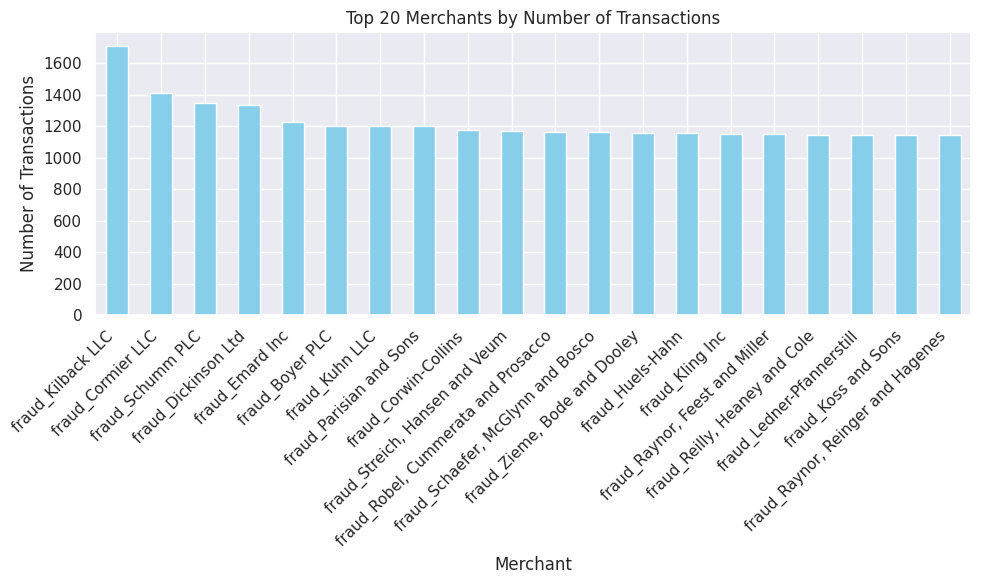

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by the 'Merchant' column and count the number of transactions
merchant_counts = data_df['merchant'].value_counts()

# Select the top 20 merchants by transaction counts
top_20_merchants = merchant_counts.head(20)

# Visualize the distribution of transactions across the top 20 merchants
plt.figure(figsize=(10, 6))
top_20_merchants.plot(kind='bar', color='skyblue')
plt.title('Top 20 Merchants by Number of Transactions')
plt.xlabel('Merchant')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


By grouping the data based on the 'Merchant' column, we observe the distribution of transactions across various merchants. The visualization highlights the top 20 merchants with the highest transaction counts.

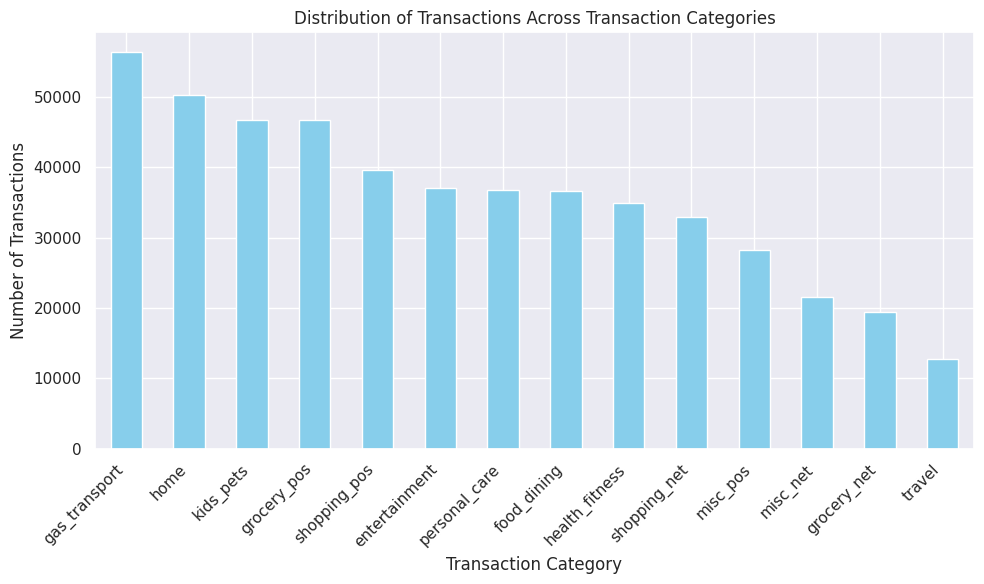

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by the 'Category' column and count the number of transactions per category
category_counts = data_df['category'].value_counts()

# Visualize the distribution of transactions across transaction categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Transactions Across Transaction Categories')
plt.xlabel('Transaction Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Grouping the data by transaction categories reveals the distribution of transactions across different categories. The bar plot illustrates the number of transactions in each category. Gas transaction, home and kids pets are top three catagories.

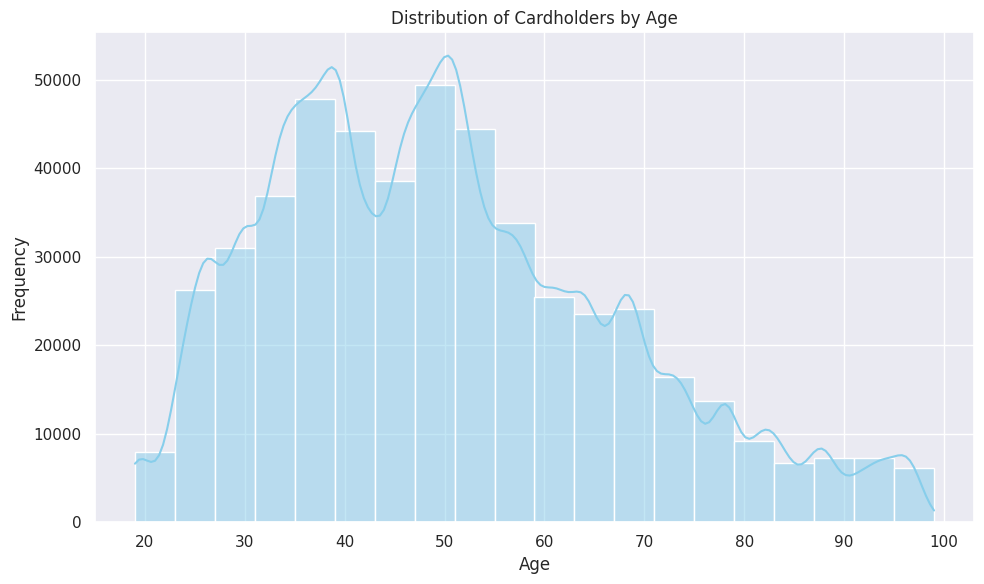

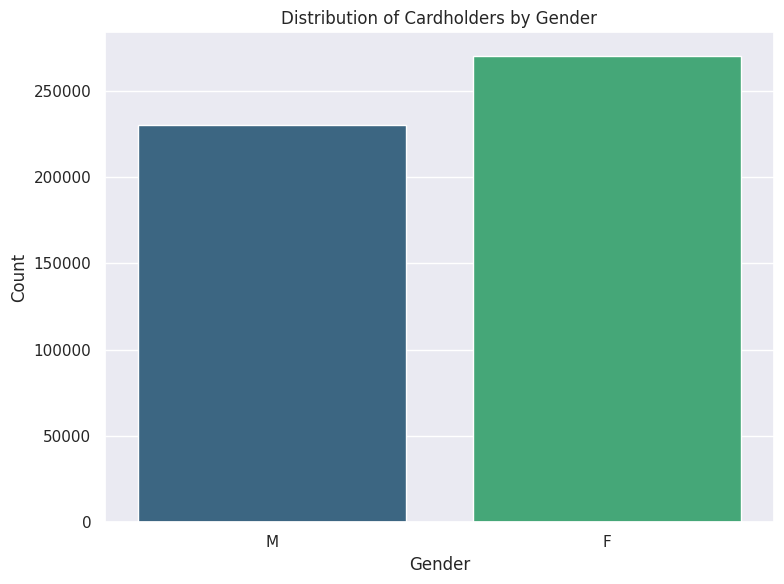

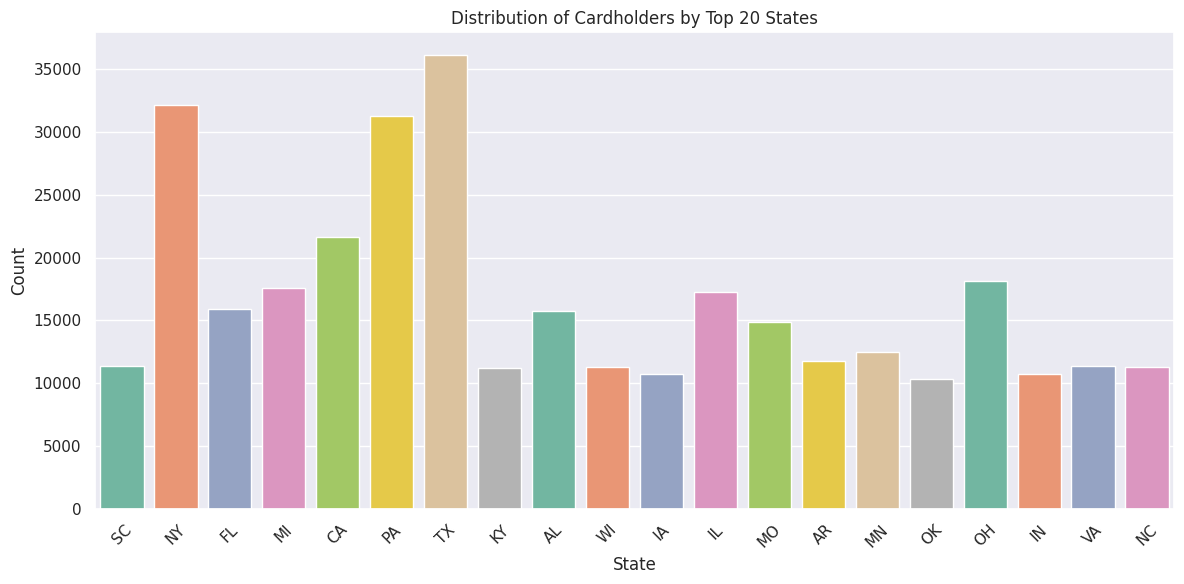

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract relevant demographic information from the dataset
demographic_data = data_df[['gender', 'dob', 'city', 'state']].copy()

# Derive the age of cardholders from their Date of Birth
demographic_data['dob'] = pd.to_datetime(demographic_data['dob'])
demographic_data['age'] = (pd.Timestamp.now() - demographic_data['dob']).astype('<m8[Y]')

# Analyze the distribution of cardholders by gender
gender_distribution = demographic_data['gender'].value_counts()

# Analyze the distribution of cardholders by age
plt.figure(figsize=(10, 6))
sns.histplot(demographic_data['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Cardholders by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Analyze the distribution of cardholders by city and state (optional)
city_distribution = demographic_data['city'].value_counts()
state_distribution = demographic_data['state'].value_counts()

# Visualize the demographic distributions
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=demographic_data, palette='viridis')
plt.title('Distribution of Cardholders by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#Optionally, we can also visualize the distribution by city or state

state_counts = data_df['state'].value_counts()

# Select the top 20 states by cardholder counts
top_20_states = state_counts.head(20)

# Plot the distribution of cardholders by the top 20 states
plt.figure(figsize=(12, 6))
sns.countplot(x='state', data=data_df[data_df['state'].isin(top_20_states.index)], palette='Set2')
plt.title('Distribution of Cardholders by Top 20 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



We extract demographic information from the dataset and analyze the distribution of cardholders by gender and age. Additionally, we can visualize the distribution by city, state, or other relevant factors to gain insights into the demographic composition of cardholders. Age 35 to 55 has the highest number of consumers, female are the highest consumer and texas and new york has the highest number of consumers.

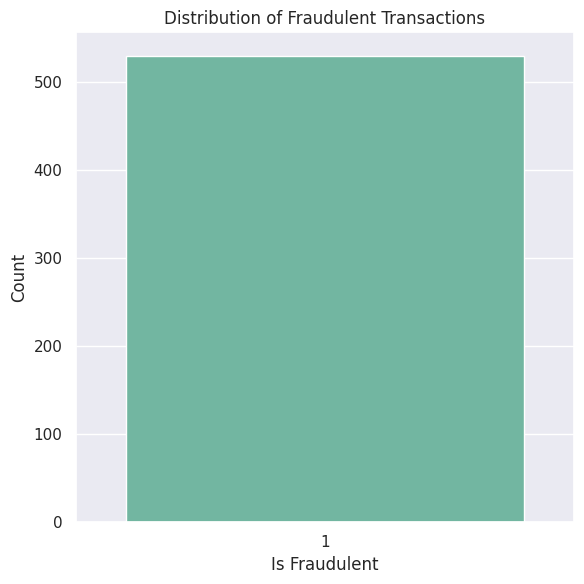

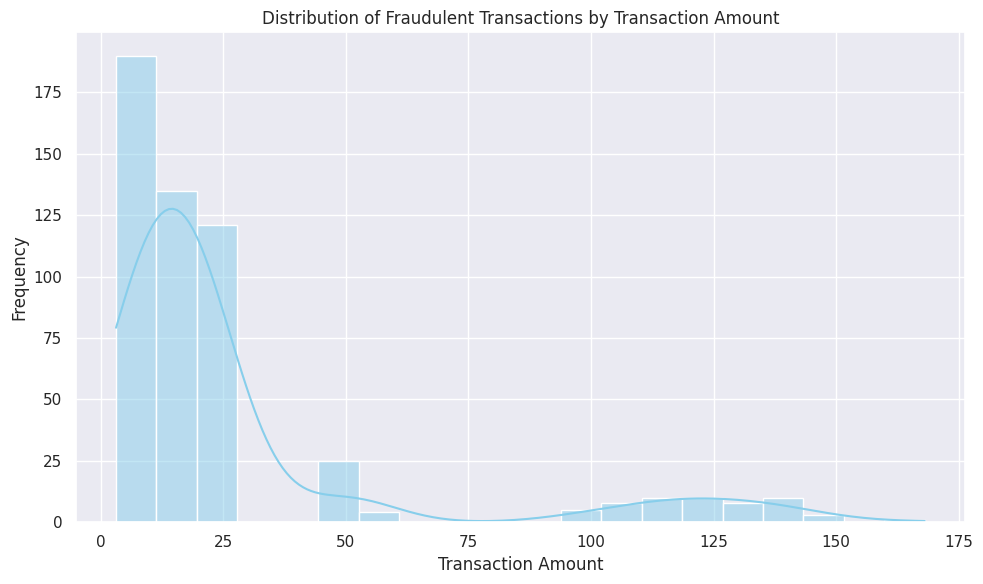

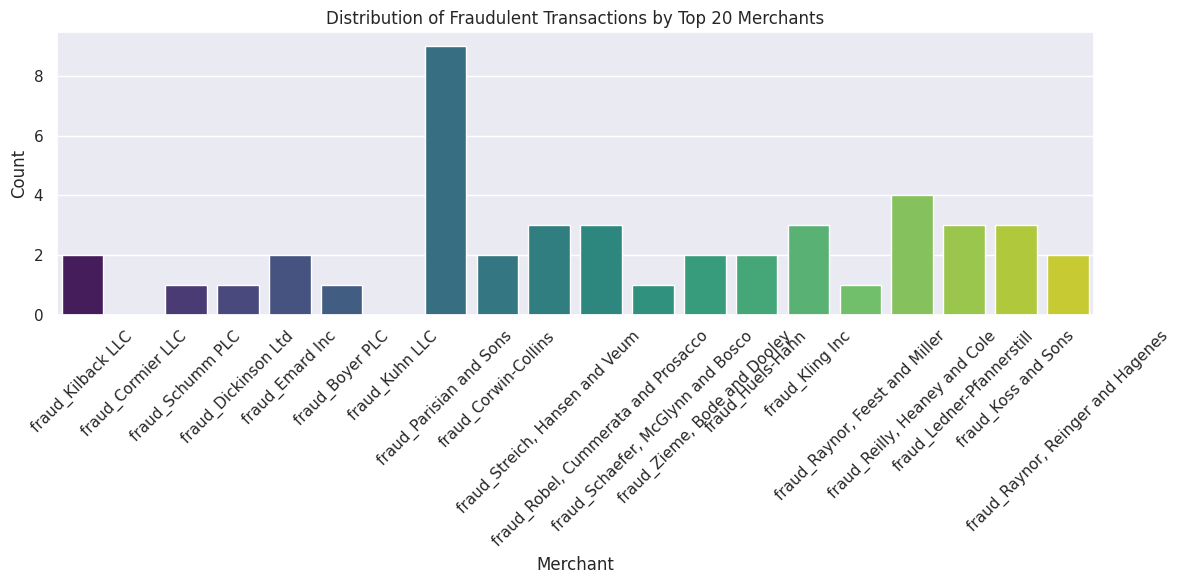

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract relevant information related to fraudulent transactions
fraud_data = data_df[data_df['is_fraud'] == 1]

# Analyze the distribution of fraudulent transactions
fraud_distribution = fraud_data['is_fraud'].value_counts()

# Visualize the distribution of fraudulent transactions
plt.figure(figsize=(6, 6))
sns.countplot(x='is_fraud', data=fraud_data, palette='Set2')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Identify patterns or factors associated with fraudulent transactions
# For example, you can analyze the distribution of fraudulent transactions by transaction amount, merchant, category, etc.
fraud_amount_distribution = fraud_data.groupby('amt')['is_fraud'].count()
fraud_merchant_distribution = fraud_data['merchant'].value_counts()
fraud_category_distribution = fraud_data['category'].value_counts()

# Visualize patterns or factors associated with fraudulent transactions (optional)
# For example, you can create histograms, bar plots, or box plots to explore relationships between fraudulent transactions and other variables.

plt.figure(figsize=(10, 6))
sns.histplot(data=fraud_data, x='amt', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Fraudulent Transactions by Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



merchant_counts = data_df['merchant'].value_counts()

# Select the top 20 merchants by transaction counts and reverse the order
top_20_merchants = merchant_counts.head(20).sort_values(ascending=False)

# Assuming 'fraud_data' is the DataFrame containing fraudulent transactions
plt.figure(figsize=(12, 6))
sns.countplot(x='merchant', data=fraud_data, order=top_20_merchants.index, palette='viridis')
plt.title('Distribution of Fraudulent Transactions by Top 20 Merchants')
plt.xlabel('Merchant')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Similarly, analyze and visualize other factors associated with fraudulent transactions as needed.


We extract fraudulent transaction data and visualize its distribution. Additionally, we analyze patterns or factors associated with fraudulent transactions, such as transaction amount, merchant, and category. Visualizations like histograms and bar plots help explore relationships between fraudulent transactions and other variables.like in the most fraudulent transactions lies between 0 to 25 and we can see the most fraud transaction happend in kuhn llc

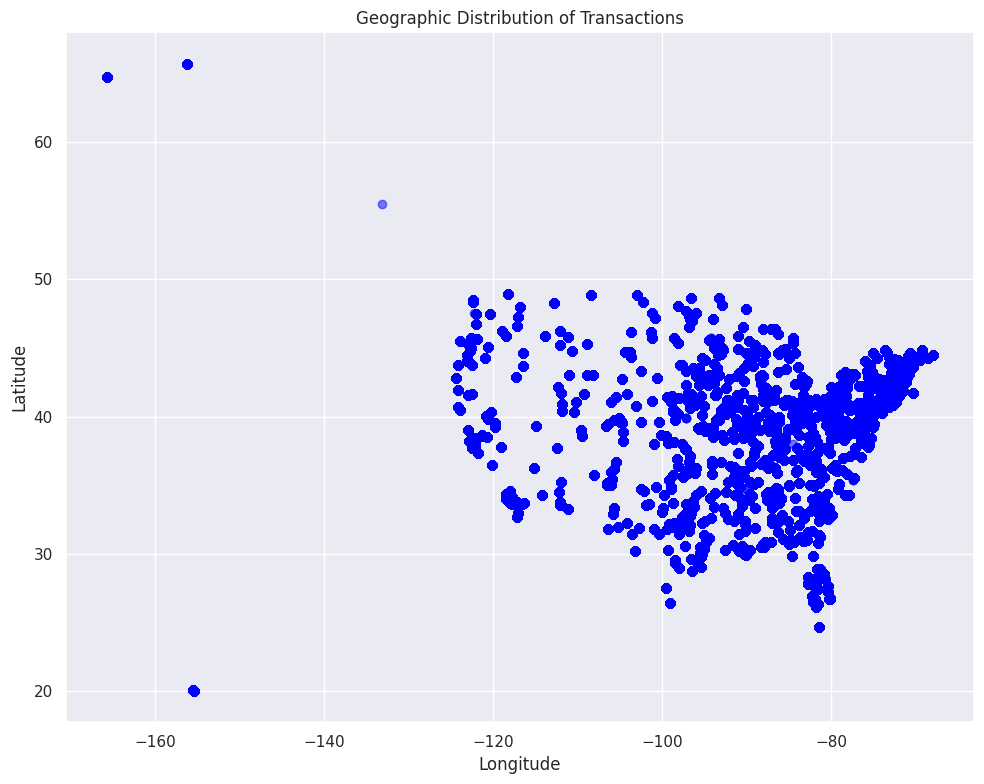

In [ ]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 8))

# Scatter plot of longitude vs latitude
plt.scatter(data_df['long'], data_df['lat'], alpha=0.5, color='blue')

# Set title and labels
plt.title('Geographic Distribution of Transactions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display grid
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Insights:

1. **Geographic Spread**: The scatter plot illustrates the geographic distribution of transactions based on longitude and latitude coordinates.

2. **Concentration of Transactions**: Areas with higher density of points indicate regions where more transactions are occurring.

3. **Spatial Patterns**: Observing the distribution of points can reveal spatial patterns or clusters, which may correspond to specific locations or regions of interest.

4. **Outliers**: Any isolated points far from the main cluster may represent outliers or unusual transaction locations.

5. **Geographical Trends**: Analyzing the distribution over time can help identify any geographical trends in transaction activity, such as shifts in popular areas or emerging markets.

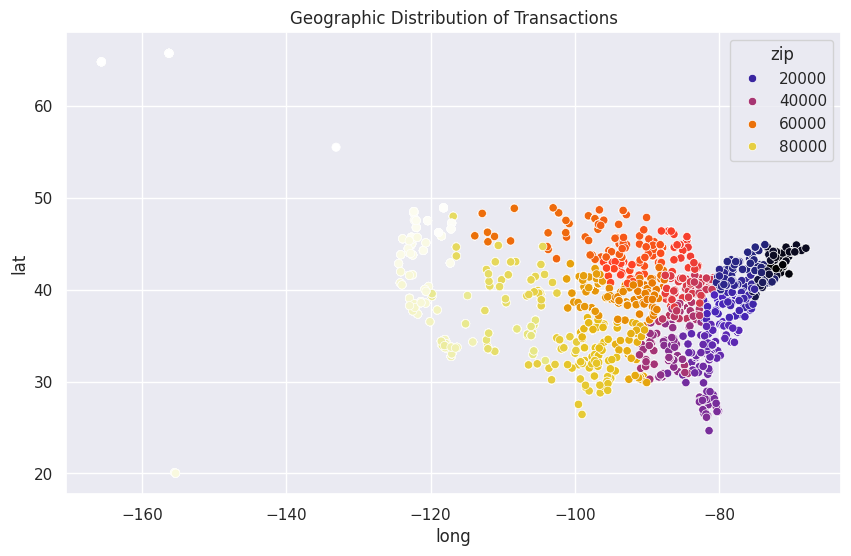

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize the geographical distribution of listings
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_df,           # DataFrame containing the data
    x='long',            # Data for the x-axis (longitude)
    y='lat',             # Data for the y-axis (latitude)
    hue='zip',
    palette='CMRmap')          # Color palette to use

plt.title('Geographic Distribution of Transactions')
plt.show()


Insights:

1. **Geographic Distribution by ZIP Code**: The scatter plot visualizes the geographical distribution of transactions based on latitude and longitude, with each point color-coded according to its ZIP code.

2. **Regional Variation**: Different colors represent different ZIP codes, allowing for the identification of regional variations in transaction activity.

3. **Spatial Patterns by Area**: Patterns in the distribution of points may indicate areas with higher or lower transaction volumes, revealing insights into the spatial dynamics of transactional behavior.

4. **Geographical Clusters**: Clusters of points with similar colors may indicate areas where transactions are concentrated, suggesting regions of economic activity or population density.

5. **ZIP Code Analysis**: Analyzing the distribution of transactions across ZIP codes can provide insights into local market dynamics and consumer behavior within specific geographical areas.

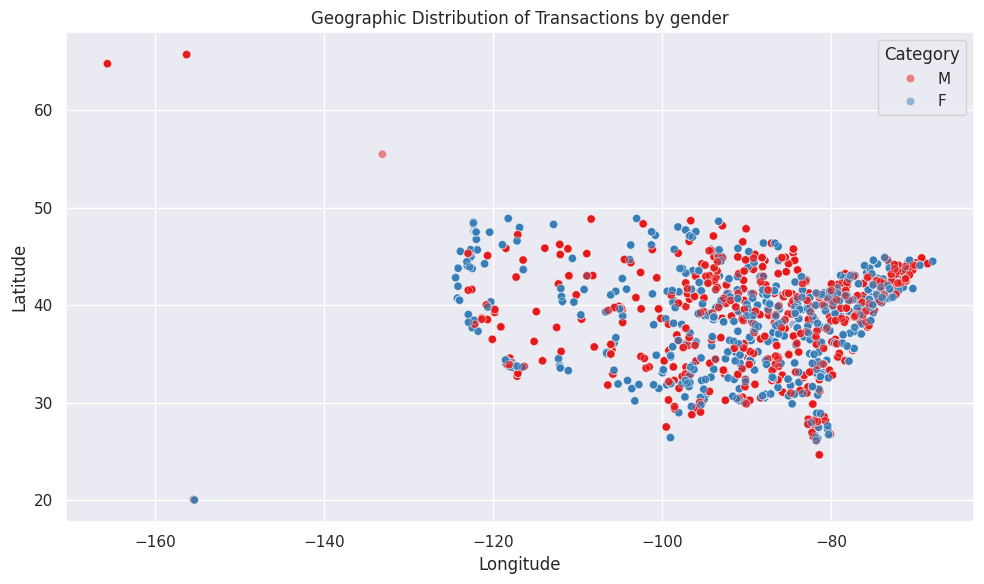

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots with hue
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_df,          # DataFrame containing the data
    x='long',              # Data for the x-axis (longitude)
    y='lat',               # Data for the y-axis (latitude)
    hue='gender',
    palette='Set1',        # Color palette to use
    alpha=0.5)             # Transparency of the points

plt.title('Geographic Distribution of Transactions by gender')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Category', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


Insights:

1. **Geographic Distribution by Gender**: The scatter plot visualizes the geographical distribution of transactions based on latitude and longitude, with each point color-coded according to the gender associated with the transaction.

2. **Identification of Gender Patterns**: Different colors represent different genders, allowing for the identification of any gender-specific patterns or trends in transaction locations.

3. **Spatial Analysis by Gender**: Analyzing the spatial distribution of transactions by gender can provide insights into gender-specific consumer behavior and preferences across different geographical regions.

4. **Comparative Analysis**: Comparing the distribution of transactions by gender can help identify any disparities or differences in transaction activity between different gender groups.

5. **Potential Gender-Based Strategies**: Insights from the geographic distribution of transactions by gender may inform targeted marketing strategies or initiatives tailored to specific gender demographics within particular geographic areas.

<Axes: xlabel='long', ylabel='lat'>

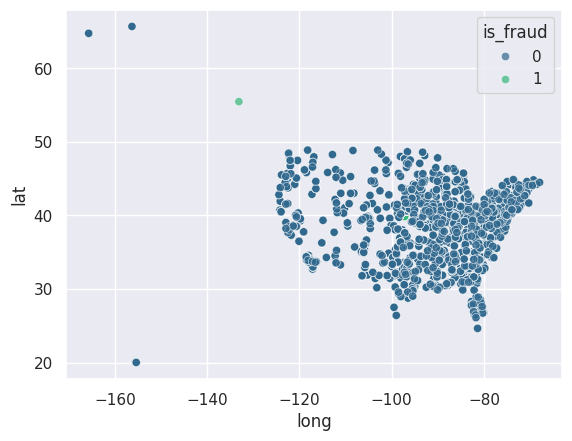

In [ ]:
import seaborn as sns

# Using seaborn to create a scatter plot
sns.scatterplot(
    data=data_df,        # DataFrame containing the data
    x='long',            # Data for the x-axis
    y='lat',             # Data for the y-axis
    hue='is_fraud',      # Data for coloring points based on fraud status
    palette='viridis',   # Color palette to use
    alpha=0.7            # Transparency of points
)


Insights:

1. **Geographic Distribution of Fraudulent Transactions**: The scatter plot visualizes the geographic distribution of transactions, with each point colored based on its fraud status (fraudulent or legitimate).

2. **Identification of Fraudulent Hotspots**: By examining the distribution of points, areas with a higher concentration of fraudulent transactions may be identified. These areas could potentially represent locations where fraudulent activities are more prevalent.

3. **Differentiating Fraudulent and Legitimate Transactions**: The color differentiation between fraudulent and legitimate transactions allows for easy identification and comparison of their spatial distribution patterns.

4. **Geospatial Analysis for Fraud Detection**: Analyzing the geographic distribution of fraudulent transactions using visualization techniques like scatter plots can aid in the development of fraud detection algorithms and strategies, particularly those focused on geographic-based anomaly detection.

5. **Enhancing Fraud Prevention Measures**: Insights gained from geospatial analysis can inform the enhancement of fraud prevention measures, such as targeted monitoring and intervention in areas with a high concentration of fraudulent activities.

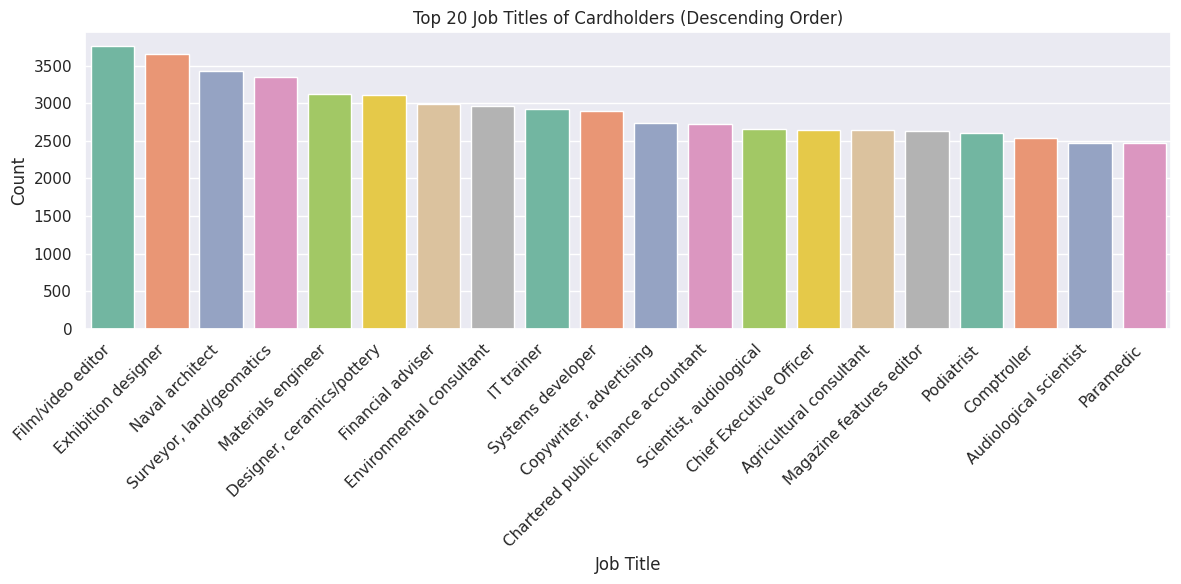

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of job titles
job_counts = data_df['job'].value_counts()

# Select the top twenty job titles by count and sort them in descending order
top_20_jobs = job_counts.head(20).sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a count plot of the top twenty job titles in descending order
sns.countplot(data=data_df[data_df['job'].isin(top_20_jobs.index)],
              x='job',
              palette='Set2',
              order=top_20_jobs.index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set plot title and labels
plt.title('Top 20 Job Titles of Cardholders (Descending Order)')
plt.xlabel('Job Title')
plt.ylabel('Count')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()


Insights:

1. **Distribution of Job Titles Among Cardholders**: The count plot illustrates the distribution of job titles among cardholders, focusing on the top 20 most common job titles.

2. **Identification of Dominant Occupations**: By analyzing the plot, we can identify the most prevalent job titles among cardholders. These dominant occupations provide insights into the demographics and socioeconomic backgrounds of the cardholders within the dataset.

3. **Understanding Cardholder Demographics**: Knowledge of the predominant job titles can aid in understanding the demographics of the cardholder population. It allows financial institutions and businesses to tailor their services and offerings to meet the specific needs and preferences of different occupational groups.

4. **Potential Insights for Marketing and Targeting**: Insights gained from analyzing job title distributions can inform marketing strategies and targeted advertising campaigns. Businesses can use this information to tailor their messaging and promotions to resonate with specific occupational segments of their customer base.

5. **Considerations for Risk Assessment**: Certain occupations may be associated with different levels of financial risk or spending behavior. Understanding the distribution of job titles among cardholders can help in assessing potential risks and designing appropriate risk mitigation strategies.

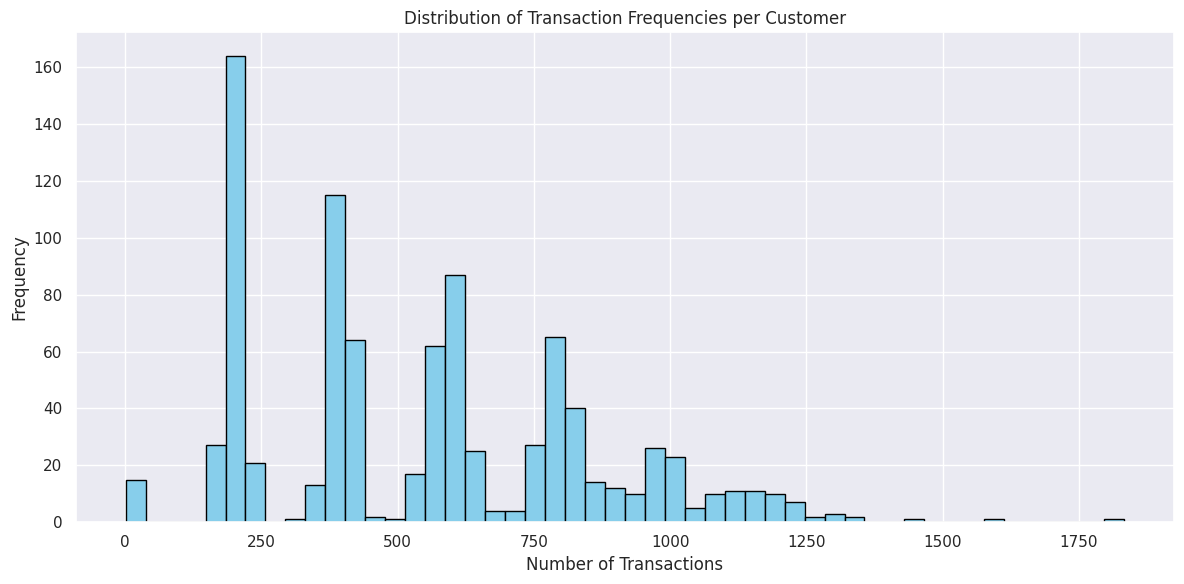

In [ ]:
import matplotlib.pyplot as plt

# Calculate the transaction frequencies per customer
transaction_freq = data_df['cc_num'].value_counts()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a histogram of transaction frequencies
plt.hist(transaction_freq, bins=50, color='skyblue', edgecolor='black')

# Set plot title and labels
plt.title('Distribution of Transaction Frequencies per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


Insights:

1. **Distribution of Transaction Frequencies**: The histogram visualizes the distribution of transaction frequencies per customer, indicating how many transactions each customer has conducted within the dataset.

2. **Understanding Customer Behavior**: By analyzing the distribution, we can gain insights into customer behavior patterns. For example, we can identify clusters of customers with high transaction frequencies, indicating potentially loyal or frequent shoppers, as well as customers with lower transaction frequencies.

3. **Identification of Outliers**: Outliers in the distribution, such as customers with extremely high transaction frequencies, may warrant further investigation. These outliers could represent anomalies or irregularities in customer behavior that require attention.

4. **Segmentation Opportunities**: The distribution can guide segmentation strategies, allowing businesses to differentiate between customer segments based on transaction frequency. This segmentation can inform targeted marketing efforts, loyalty programs, or personalized services tailored to specific customer segments.

5. **Risk Assessment**: Transaction frequency can also be a factor in risk assessment and fraud detection. Unusually high transaction frequencies or sudden spikes in activity may indicate potential fraud or suspicious behavior, prompting additional scrutiny or intervention measures.

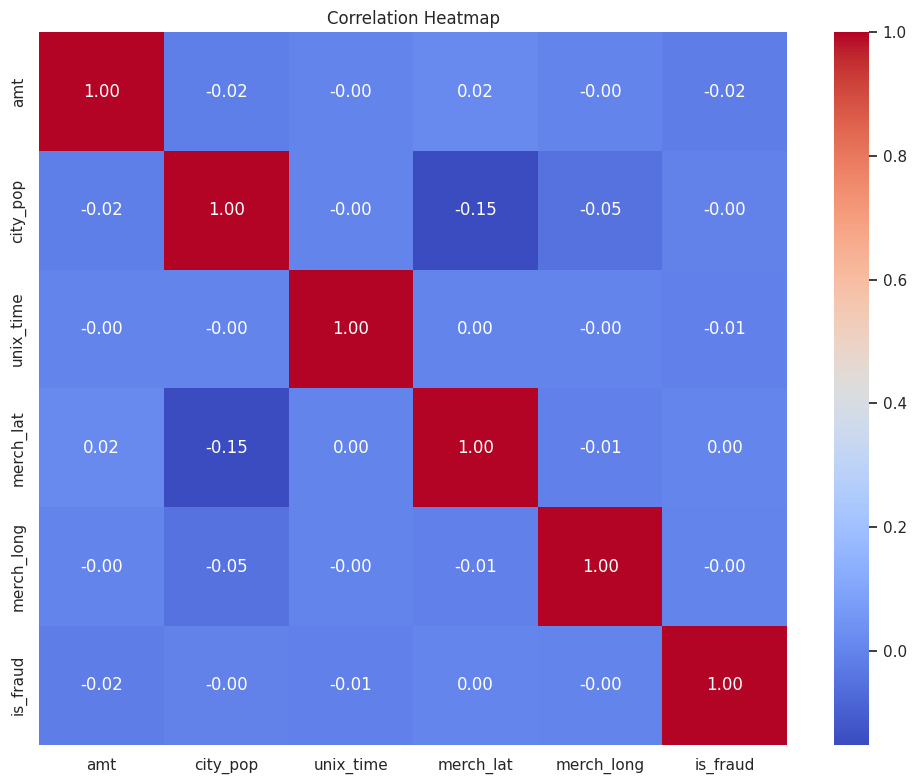

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical attributes and potential indicators of fraud
numerical_attributes = ['amt', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

# Compute the correlation matrix
correlation_matrix = data_df[numerical_attributes].corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set plot title
plt.title('Correlation Heatmap')

# Show plot
plt.tight_layout()
plt.show()


Insights:

1. **Correlation Analysis**: The heatmap visualizes the correlation matrix between selected numerical attributes and the target variable "is_fraud." Each cell in the heatmap represents the correlation coefficient between two attributes, ranging from -1 to 1.

2. **Identifying Correlated Attributes**: Positive correlations (values closer to 1) suggest a direct relationship between attributes, while negative correlations (values closer to -1) indicate an inverse relationship. For example, if "amt" and "city_pop" have a positive correlation, it implies that higher transaction amounts tend to occur in more populous cities.

3. **Potential Predictors of Fraud**: Attributes with higher absolute correlation coefficients with "is_fraud" may serve as potential predictors of fraudulent transactions. For instance, if "amt" exhibits a strong positive correlation with "is_fraud," it suggests that higher transaction amounts might be associated with a higher likelihood of fraud.

4. **Feature Selection**: Correlation analysis can inform feature selection for machine learning models by identifying attributes that have a significant relationship with the target variable. Attributes with low correlation coefficients with "is_fraud" may be less informative for predicting fraud and could potentially be excluded from the model.

5. **Interpreting Correlation Coefficients**: It's essential to interpret correlation coefficients cautiously and consider other factors such as causality, domain knowledge, and potential confounding variables. Correlation does not imply causation, and further analysis is necessary to establish causal relationships between attributes and fraudulent transactions.

In [ ]:
data_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

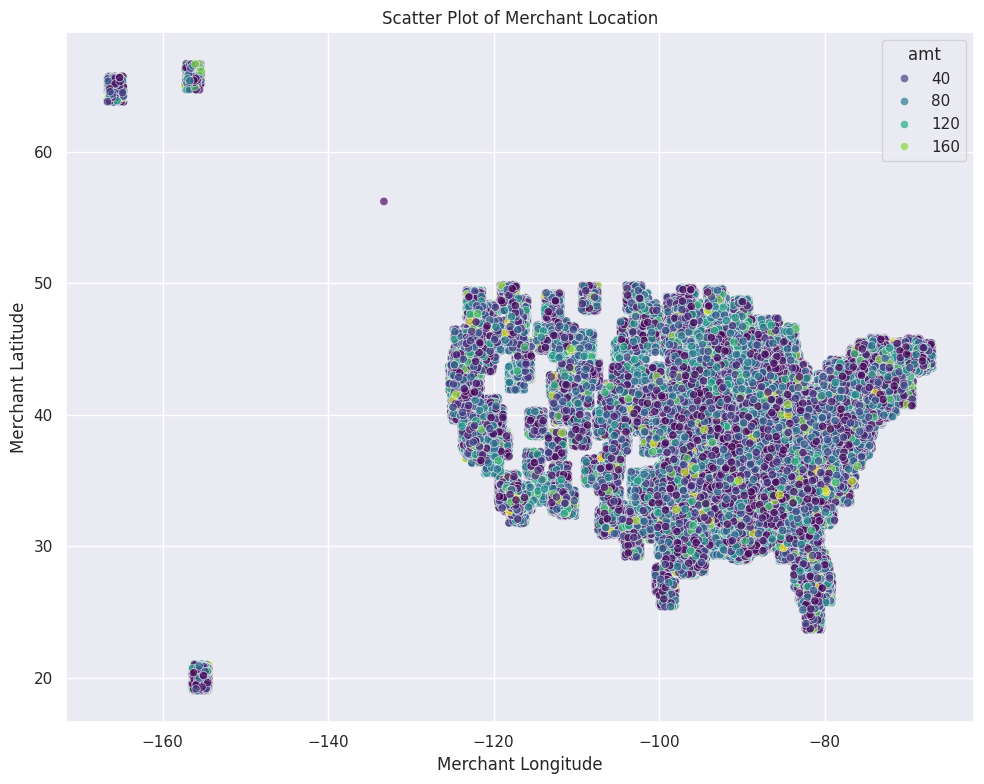

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a scatter plot
sns.scatterplot(data=data_df,
                x='merch_long',
                y='merch_lat',
                hue='amt',  # Total transaction amount as hue
                palette='viridis',
                alpha=0.7)

# Set plot title and labels
plt.title('Scatter Plot of Merchant Location')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')

# Show plot
plt.tight_layout()
plt.show()


Insights:

1. **Geographical Distribution**: The scatter plot visualizes the geographical distribution of merchant locations based on latitude and longitude coordinates.

2. **Color Encoding**: The color of each data point represents the total transaction amount associated with the corresponding merchant. Darker colors indicate higher transaction amounts, while lighter colors represent lower transaction amounts.

3. **Identifying Transaction Hotspots**: Clusters of dark-colored data points suggest areas with higher transaction volumes or larger transaction amounts. These clusters may correspond to commercial areas, shopping centers, or regions with high economic activity.

4. **Analyzing Spatial Patterns**: Observing spatial patterns in the distribution of transaction amounts can provide insights into consumer behavior, merchant popularity, and economic trends in different geographical areas.

5. **Potential Anomalies**: Outliers or isolated data points with unusually high transaction amounts in specific geographic locations may indicate potential anomalies or fraudulent activities that warrant further investigation.

In [ ]:
data_df.is_fraud.unique()

array([0, 1])

In [ ]:
data_df.is_fraud.value_counts()

0    499747
1       530
Name: is_fraud, dtype: int64

In [ ]:
# 1 represents fraud
# 0 represents no-fraud

<Axes: xlabel='is_fraud', ylabel='count'>

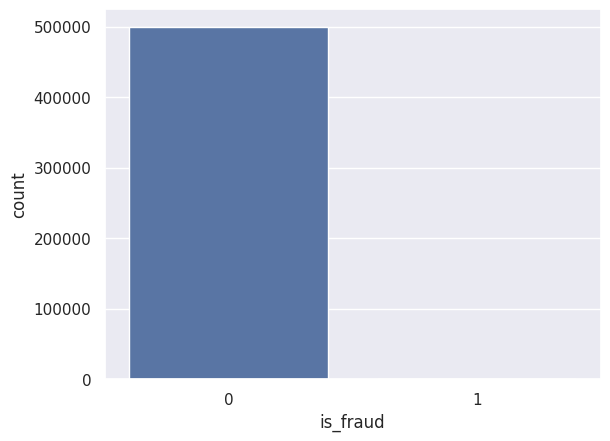

In [ ]:
# so we have to see if we have balanced data or  not that means if we have equal count of fraud and non_fraud class
sns.countplot(x=data_df.is_fraud)

# Here we can see that the data is highly imbalanced so we have to balance he data by SMOT. which we will do later.

# **End of Analysis**

In [ ]:
data_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [ ]:
data_df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
Year                              int64
Month                             int64
Day                               int64


# **Count of unique value in each columns**

In [ ]:
data_df['merchant'].value_counts()

fraud_Kilback LLC                        1712
fraud_Cormier LLC                        1410
fraud_Schumm PLC                         1346
fraud_Dickinson Ltd                      1338
fraud_Emard Inc                          1226
                                         ... 
fraud_Satterfield-Lowe                    233
fraud_Ritchie, Bradtke and Stiedemann     231
fraud_Douglas, DuBuque and McKenzie       230
fraud_Kessler Inc                         221
fraud_Jerde-Hermann                       218
Name: merchant, Length: 693, dtype: int64

In [ ]:
data_df['category'].value_counts()

gas_transport     56370
home              50294
kids_pets         46784
grocery_pos       46757
shopping_pos      39683
entertainment     37057
personal_care     36798
food_dining       36624
health_fitness    34979
shopping_net      32977
misc_pos          28222
misc_net          21571
grocery_net       19413
travel            12748
Name: category, dtype: int64

In [ ]:
data_df['gender'].value_counts()

F    270280
M    229997
Name: gender, dtype: int64

In [ ]:
data_df['street'].value_counts()

6114 Adams Harbor Suite 096      1331
6983 Carrillo Isle               1321
6296 John Keys Suite 858         1316
444 Robert Mews                  1308
43235 Mckenzie Views Apt. 837    1290
                                 ... 
9652 Ford Ford Apt. 566             1
6386 Bailey Hill Apt. 421           1
007 Tonya Isle Suite 299            1
5942 Thomas Park                    1
914 Nancy Square                    1
Name: street, Length: 923, dtype: int64

In [ ]:
data_df['city'].value_counts()

Birmingham     2199
Utica          2035
San Antonio    1971
Phoenix        1915
Meridian       1886
               ... 
Lexington         1
Kirkwood          1
Seattle           1
Wever             1
Craig             1
Name: city, Length: 848, dtype: int64

In [ ]:
data_df['trans_num'].value_counts()

2da90c7d74bd46a0caf3777415b3ebd3    1
a50f7d9e64c665d500550a5476c8c245    1
ef4517efdf01d6a27bbb914d8cbe954a    1
51b52e881c647ef7dd366aa7f0ecb960    1
c589d1c2d4501e39092f2c05b60f9bd1    1
                                   ..
1e4408f1535a3b135dcf135c399f8849    1
0f56fd8f90ee9678ad27325026d3818d    1
5b2a0d636ba6e8c07b000325d68bcf70    1
c7fb02df2fc7365cdd68c593476c6257    1
1765bb45b3aa3224b4cdcb6e7a96cee3    1
Name: trans_num, Length: 500277, dtype: int64

In [ ]:
data_df['dob'].value_counts()

23/03/1977    2024
15/09/1988    1717
29/08/1981    1712
06/05/1955    1339
07/10/1998    1331
              ... 
30/12/1962       1
14/11/1968       1
23/12/1936       1
02/08/1998       1
17/06/1997       1
Name: dob, Length: 909, dtype: int64

In [ ]:
data_df['job'].value_counts()

Film/video editor                3756
Exhibition designer              3658
Naval architect                  3426
Surveyor, land/geomatics         3348
Materials engineer               3119
                                 ... 
Merchandiser, retail              164
Geneticist, molecular             161
Engineer, water                     3
Software engineer                   1
Operational investment banker       1
Name: job, Length: 478, dtype: int64

In [ ]:
data_df['state'].value_counts()

TX    36137
NY    32190
PA    31300
CA    21657
OH    18159
MI    17621
IL    17254
FL    15953
AL    15737
MO    14905
MN    12485
AR    11786
VA    11393
SC    11364
WI    11317
NC    11284
KY    11250
IN    10766
IA    10739
OK    10310
GA    10225
MD    10180
WV     9671
NJ     9487
NE     9379
KS     8852
LA     8049
MS     7951
WY     7645
WA     7171
OR     7078
TN     6606
ME     6324
NM     6298
ND     5840
CO     5280
SD     4839
MA     4693
MT     4618
VT     4618
UT     4192
AZ     3990
NH     3133
CT     2958
NV     2183
ID     2155
DC     1341
HI      986
AK      753
RI      175
Name: state, dtype: int64

**This help us to understand that how many unique columns we should take and the threshold we need to take because we can't take all of the value that will create huge numbers of columns which will lead to high dimentionality. which will create ovefitting.**

# **Date time changing**

In [ ]:
import pandas as pd

# Convert 'trans_date_trans_time' and 'dob' to datetime objects
data_df['trans_date_trans_time'] = pd.to_datetime(data_df['trans_date_trans_time'])
data_df['dob'] = pd.to_datetime(data_df['dob'])

# Extract relevant features from 'trans_date_trans_time'
data_df['trans_year'] = data_df['trans_date_trans_time'].dt.year
data_df['trans_month'] = data_df['trans_date_trans_time'].dt.month
data_df['trans_day'] = data_df['trans_date_trans_time'].dt.day
data_df['trans_hour'] = data_df['trans_date_trans_time'].dt.hour

# Extract relevant features from 'dob'
data_df['dob_year'] = data_df['dob'].dt.year
data_df['dob_month'] = data_df['dob'].dt.month
data_df['dob_day'] = data_df['dob'].dt.day

# Drop the original datetime columns
data_df.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

# Now, data_df contains new columns 'trans_year', 'trans_month', 'trans_day', 'trans_hour',
# 'dob_year', 'dob_month', 'dob_day' with extracted features from datetime variables.



1. **Date-Time Conversion**: The code snippet converts two columns, 'trans_date_trans_time' and 'dob', from string format to datetime objects using the `pd.to_datetime()` function.

2. **Feature Extraction**: Relevant features such as year, month, day, and hour are extracted from the datetime columns using attributes like `dt.year`, `dt.month`, `dt.day`, and `dt.hour`.

3. **New Columns**: After feature extraction, the original datetime columns are dropped from the DataFrame, and new columns 'trans_year', 'trans_month', 'trans_day', 'trans_hour', 'dob_year', 'dob_month', 'dob_day' are added to represent the extracted features.

4. **Enhanced Data Representation**: The transformation enhances the data representation by providing additional temporal information, which can be valuable for time-based analysis, seasonal patterns, and modeling temporal dependencies in machine learning tasks.

Now, data_df contains new columns 'trans_year', 'trans_month', 'trans_day', 'trans_hour',
'dob_year', 'dob_month', 'dob_day' with extracted features from datetime variables. **bold text**

In [ ]:
import pandas as pd
from datetime import datetime

# Calculate the current year
current_year = datetime.now().year

# Calculate age by subtracting the year of birth from the current year
data_df['age'] = current_year - data_df['dob_year']

# Now, data_df contains a new column 'age' with the age of each person.


**Now, data_df contains a new column 'age' with the age of each person.**

In [ ]:
data_df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,Day,Hour,trans_year,trans_month,trans_day,trans_hour,dob_year,dob_month,dob_day,age
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,21,12,2020,6,21,12,1968,3,19,56
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,21,12,2020,6,21,12,1990,1,17,34
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,21,12,2020,6,21,12,1970,10,21,54
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,21,12,2020,6,21,12,1987,7,25,37
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,21,12,2020,6,21,12,1955,6,7,69


In [ ]:
# Filter the DataFrame to find entries where age is greater than 100
age_greater_than_100 = data_df[data_df['age'] > 100]

# Now, age_greater_than_100 contains the entries where the age is greater than 100.


In [ ]:
# Count the number of entries where age is greater than 100
count_age_greater_than_100 = data_df[data_df['age'] > 100].shape[0]

# Print the count
print("Count of entries where age is greater than 100:", count_age_greater_than_100)


Count of entries where age is greater than 100: 0


# **Droping columns to reduce dimentionality and overfitting also these columns will not help in prediction so its better to drop them**

In [ ]:
# Drop the specified columns
columns_to_drop = ['merchant','first', 'last', 'trans_num', 'merch_lat', 'merch_long', 'unix_time','cc_num','city','state','lat','long','dob_year','trans_hour', 'dob_year',
       'dob_month', 'dob_day','Day', 'Hour','street']
data_df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [ ]:
columns_to_drop = ['merchant']

In [ ]:
data_df.columns

Index(['category', 'amt', 'gender', 'zip', 'city_pop', 'job', 'is_fraud',
       'Year', 'Month', 'trans_year', 'trans_month', 'trans_day', 'age'],
      dtype='object')

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500277 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   category     500277 non-null  object 
 1   amt          500277 non-null  float64
 2   gender       500277 non-null  object 
 3   zip          500277 non-null  int64  
 4   city_pop     500277 non-null  int64  
 5   job          500277 non-null  object 
 6   is_fraud     500277 non-null  int64  
 7   Year         500277 non-null  int64  
 8   Month        500277 non-null  int64  
 9   trans_year   500277 non-null  int64  
 10  trans_month  500277 non-null  int64  
 11  trans_day    500277 non-null  int64  
 12  age          500277 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 53.4+ MB


In [ ]:
data_df.describe()

,amt,zip,city_pop,is_fraud,Year,Month,trans_year,trans_month,trans_day,age
count,500277.000000,500277.000000,5.002770e+05,500277.000000,500277.0,500277.000000,500277.0,500277.000000,500277.000000,500277.000000
mean,53.174288,48775.301289,8.619079e+04,0.001059,2020.0,8.333125,2020.0,8.333125,17.643901,50.712731
std,43.460790,26846.102598,2.961525e+05,0.032531,0.0,2.988213,0.0,2.988213,7.487983,17.443219
min,2.430000,1257.000000,2.300000e+01,0.000000,2020.0,1.000000,2020.0,1.000000,7.000000,19.000000
25%,12.040000,26237.000000,7.320000e+02,0.000000,2020.0,7.000000,2020.0,7.000000,11.000000,37.000000
50%,47.280000,48174.000000,2.328000e+03,0.000000,2020.0,9.000000,2020.0,9.000000,17.000000,49.000000
75%,78.490000,72011.000000,1.905400e+04,0.000000,2020.0,11.000000,2020.0,11.000000,24.000000,62.000000
max,193.050000,99921.000000,2.906700e+06,1.000000,2020.0,12.000000,2020.0,12.000000,31.000000,100.000000


# **Feature engineering :-)**

# **Threshold**
we use threshold to limit the number of columns we are going to create.

In [ ]:
import pandas as pd

# Define the frequency threshold
threshold = 1500  # Adjust this threshold as needed

# Get the value counts for the 'street' column
street_counts = data_df['job'].value_counts()

# Identify the top N most frequent values
top_values = street_counts[street_counts >= threshold].index.tolist()

# Replace values not in the top N with 'Other'
data_df['job'] = data_df['job'].apply(lambda x: x if x in top_values else 'Other')

# Now 'street' column contains only the top N most frequent values and 'Other' for all other values


# **One hot encoding**
this will change text to numbers

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Specify the columns to be one-hot encoded
columns_to_encode = ['gender','job','category']

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder on the selected columns
encoder.fit(data_df[columns_to_encode])

# Transform the selected columns into one-hot encoded features
encoded_features = encoder.transform(data_df[columns_to_encode])

# Convert the one-hot encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))

# Drop the original columns from the DataFrame
data_df.drop(columns_to_encode, axis=1, inplace=True)

# Concatenate the encoded DataFrame with the original DataFrame
data_df_encoded = pd.concat([data_df, encoded_df], axis=1)

# Now data_df_encoded contains the original DataFrame with selected columns replaced by one-hot encoded features


1. **Importing Libraries**: The code snippet imports the required libraries, including OneHotEncoder from sklearn.preprocessing for one-hot encoding and pandas for data manipulation.

2. **Columns Selection**: The columns to be one-hot encoded are specified in the list `columns_to_encode`, which includes 'gender', 'job', and 'category'.

3. **OneHotEncoder Initialization**: An instance of the OneHotEncoder class is initialized.

4. **Fitting the Encoder**: The OneHotEncoder is fitted to the selected columns from the DataFrame using the `fit()` method.

5. **Transforming Features**: The selected columns are transformed into one-hot encoded features using the `transform()` method.

6. **Conversion to DataFrame**: The resulting one-hot encoded features are converted into a DataFrame named `encoded_df` for better representation.

7. **Dropping Original Columns**: The original columns selected for one-hot encoding are dropped from the original DataFrame using the `drop()` method.

8. **Concatenation**: The one-hot encoded DataFrame `encoded_df` is concatenated with the original DataFrame `data_df`, resulting in a new DataFrame named `data_df_encoded`.

9. **Final Result**: The DataFrame `data_df_encoded` contains the original data with selected columns replaced by their one-hot encoded representations, facilitating machine learning model training and analysis.

In [ ]:
data_df_encoded.head()

,amt,zip,city_pop,is_fraud,Year,Month,trans_year,trans_month,trans_day,age,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,29209.0,333497.0,0.0,2020.0,6.0,2020.0,6.0,21.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,29.84,84002.0,302.0,0.0,2020.0,6.0,2020.0,6.0,21.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,41.28,11710.0,34496.0,0.0,2020.0,6.0,2020.0,6.0,21.0,54.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.05,32780.0,54767.0,0.0,2020.0,6.0,2020.0,6.0,21.0,37.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.19,49632.0,1126.0,0.0,2020.0,6.0,2020.0,6.0,21.0,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data_df_encoded.columns

Index(['amt', 'zip', 'city_pop', 'is_fraud', 'Year', 'Month', 'trans_year',
       'trans_month', 'trans_day', 'age',
       ...
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object', length=140)

In [ ]:
data_df_encoded.isnull()

,amt,zip,city_pop,is_fraud,Year,Month,trans_year,trans_month,trans_day,age,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500218,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
500238,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
500242,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
500254,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


# **value filled with mode**
filling null values here

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fill missing values in all columns of the DataFrame
data_df_encoded_filled = pd.DataFrame(imputer.fit_transform(data_df_encoded), columns=data_df_encoded.columns)

# Ensure that the data types are preserved (since mode imputation might change data types)
data_df_encoded_filled = data_df_encoded_filled.astype(data_df_encoded.dtypes)

# Check if any missing values are remaining
missing_values_count = data_df_encoded_filled.isnull().sum().sum()
print("Total missing values after imputation:", missing_values_count)

# Now, data_df_encoded_filled contains the DataFrame with missing values filled using mode imputation


Total missing values after imputation: 0


1. **Importing Libraries**: The code snippet imports the required libraries, including SimpleImputer from sklearn.impute for imputation and pandas for data manipulation.

2. **Imputer Initialization**: An instance of SimpleImputer is created with the strategy parameter set to 'most_frequent', indicating that missing values will be filled with the most frequent value in each column.

3. **Imputation Process**: The imputer's `fit_transform()` method is applied to the DataFrame `data_df_encoded` to fill missing values in all columns. The result is stored in a new DataFrame named `data_df_encoded_filled`.

4. **Preservation of Data Types**: To ensure that the data types are preserved after imputation, the `astype()` method is used to convert the data types of the imputed DataFrame `data_df_encoded_filled` to match those of the original DataFrame `data_df_encoded`.

5. **Check for Missing Values**: The code checks if any missing values remain in the imputed DataFrame `data_df_encoded_filled` using the `isnull().sum().sum()` method. The total count of missing values is printed.

6. **Final Result**: The DataFrame `data_df_encoded_filled` now contains the original data with missing values filled using mode imputation, ensuring completeness and maintaining data integrity for further analysis or model training.

In [ ]:
data_df_encoded_filled.shape

(550398, 140)

In [ ]:
data_df_encoded_filled.isnull()

,amt,zip,city_pop,is_fraud,Year,Month,trans_year,trans_month,trans_day,age,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
550394,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
550395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
550396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_df_encoded_filled.isnull().any()

amt                       False
zip                       False
city_pop                  False
is_fraud                  False
Year                      False
                          ...  
category_misc_pos         False
category_personal_care    False
category_shopping_net     False
category_shopping_pos     False
category_travel           False
Length: 140, dtype: bool

In [ ]:
import pandas as pd

# Assuming data_df is your DataFrame
data_df_copy = data_df_encoded_filled.copy()


# **x and y split**
splitting the data into x and y variable for training.

In [ ]:
# spit data
x = data_df_copy.drop('is_fraud', axis=1)
y = data_df_copy.is_fraud

# **Smote-Balancing the data**
here we have used smote on x and y for balancing the data because we have less number of fraud value and high number of non_fraud values. so to get a good prediction we have to have equal number of values in both catagories.

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
x_balanced, y_balanced = smote.fit_resample(x, y)

# Check the class distribution after balancing
balanced_value_counts = pd.Series(y_balanced).value_counts()
print(balanced_value_counts)


0.0    549868
1.0    549868
Name: is_fraud, dtype: int64


1. **Importing Libraries**: The code snippet imports SMOTE (Synthetic Minority Over-sampling Technique) from imbalanced-learn library for oversampling and pandas for data manipulation.

2. **SMOTE Initialization**: An instance of SMOTE is created with the `random_state` parameter set to 42 for reproducibility.

3. **Applying SMOTE**: The `fit_resample()` method of the SMOTE object is applied to the feature matrix `x` and the target vector `y`. This method oversamples the minority class to balance the dataset, generating synthetic samples from the minority class instances.

4. **Balanced Dataset**: The balanced feature matrix `x_balanced` and target vector `y_balanced` are obtained after applying SMOTE. These arrays contain the balanced dataset with equal class distribution.

5. **Checking Class Distribution**: The class distribution of the target vector `y_balanced` is printed using the `value_counts()` method of a pandas Series. This provides the count of each class in the balanced dataset, confirming that the classes are now balanced after oversampling with SMOTE.

In [ ]:
# Check the count of each unique value in the target variable 'is_fraud' after balancing
is_fraud_counts = y_balanced.value_counts()
print(is_fraud_counts)


0.0    549868
1.0    549868
Name: is_fraud, dtype: int64


Here we have equal number of fraud which is 1 and non_fraud which is 0

# **Training the data**

In [ ]:
# Use balanced data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.30, random_state=42)


In [ ]:
# Size of x_train and y_train
print("Size of x_train:", x_train.shape)
print("Size of y_train:", y_train.shape)

Size of x_train: (769815, 139)
Size of y_train: (769815,)


In [ ]:
# Size of x_test and y_test
print("Size of x_test:", x_test.shape)
print("Size of y_test:", y_test.shape)

Size of x_test: (329921, 139)
Size of y_test: (329921,)


In [ ]:
# Size of the entire dataset x and y
print("Size of x (entire dataset):", x.shape)
print("Size of y (entire dataset):", y.shape)


Size of x (entire dataset): (550398, 139)
Size of y (entire dataset): (550398,)


# **Reducing dimentinality**

# **Important freauture selection**
The number of columns is very high it will lead to overfitting so avoid that we have to reduce the number of columns

In [ ]:
# 1. Train a Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)  # Use the balanced training data

# 2. Retrieve feature importance scores
feature_importances = dt_classifier.feature_importances_

# 3. Select top features
selector = SelectFromModel(dt_classifier, threshold='median')
selector.fit(x_train, y_train)  # Use the balanced training data
selected_features = x_train.columns[selector.get_support()]

# 4. Train a new Decision Tree model using selected features
x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)
dt_classifier_selected = DecisionTreeClassifier()
dt_classifier_selected.fit(x_train_selected, y_train)  # Use the balanced training data for training


DecisionTreeClassifier()

# **Predicting the labels**

In [ ]:
# Predicting the labels for the test set using the trained Decision Tree model with selected features
y_pred = dt_classifier_selected.predict(x_test_selected)

# **Evaluate the model**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9988482091167279
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    164788
         1.0       1.00      1.00      1.00    165133

    accuracy                           1.00    329921
   macro avg       1.00      1.00      1.00    329921
weighted avg       1.00      1.00      1.00    329921

Confusion Matrix:
[[164568    220]
 [   160 164973]]


#**Hyperparameter Tuning**

In [ ]:
# Example of hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 15],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(dt_classifier_selected, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_selected, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a new model with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_train_selected, y_train)

# Evaluate the model
y_pred_best = best_dt_classifier.predict(x_test_selected)
print("Accuracy after hyperparameter tuning:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy after hyperparameter tuning: 0.9103179245940695


Train a New Model: Use the best parameters obtained from grid search to train a new instance of your model. In this case, we create a new DecisionTreeClassifier with the best parameters and fit it to this training data.

In [ ]:
best_dt_classifier = DecisionTreeClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=2)
best_dt_classifier.fit(x_train_selected, y_train)


DecisionTreeClassifier(max_depth=7)

Evaluate the Model: After training the new model, evaluate its performance on the test set to ensure that the hyperparameter tuning has improved its generalization ability.

In [ ]:
y_pred_best = best_dt_classifier.predict(x_test_selected)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy after hyperparameter tuning:", accuracy_best)


Accuracy after hyperparameter tuning: 0.9103179245940695


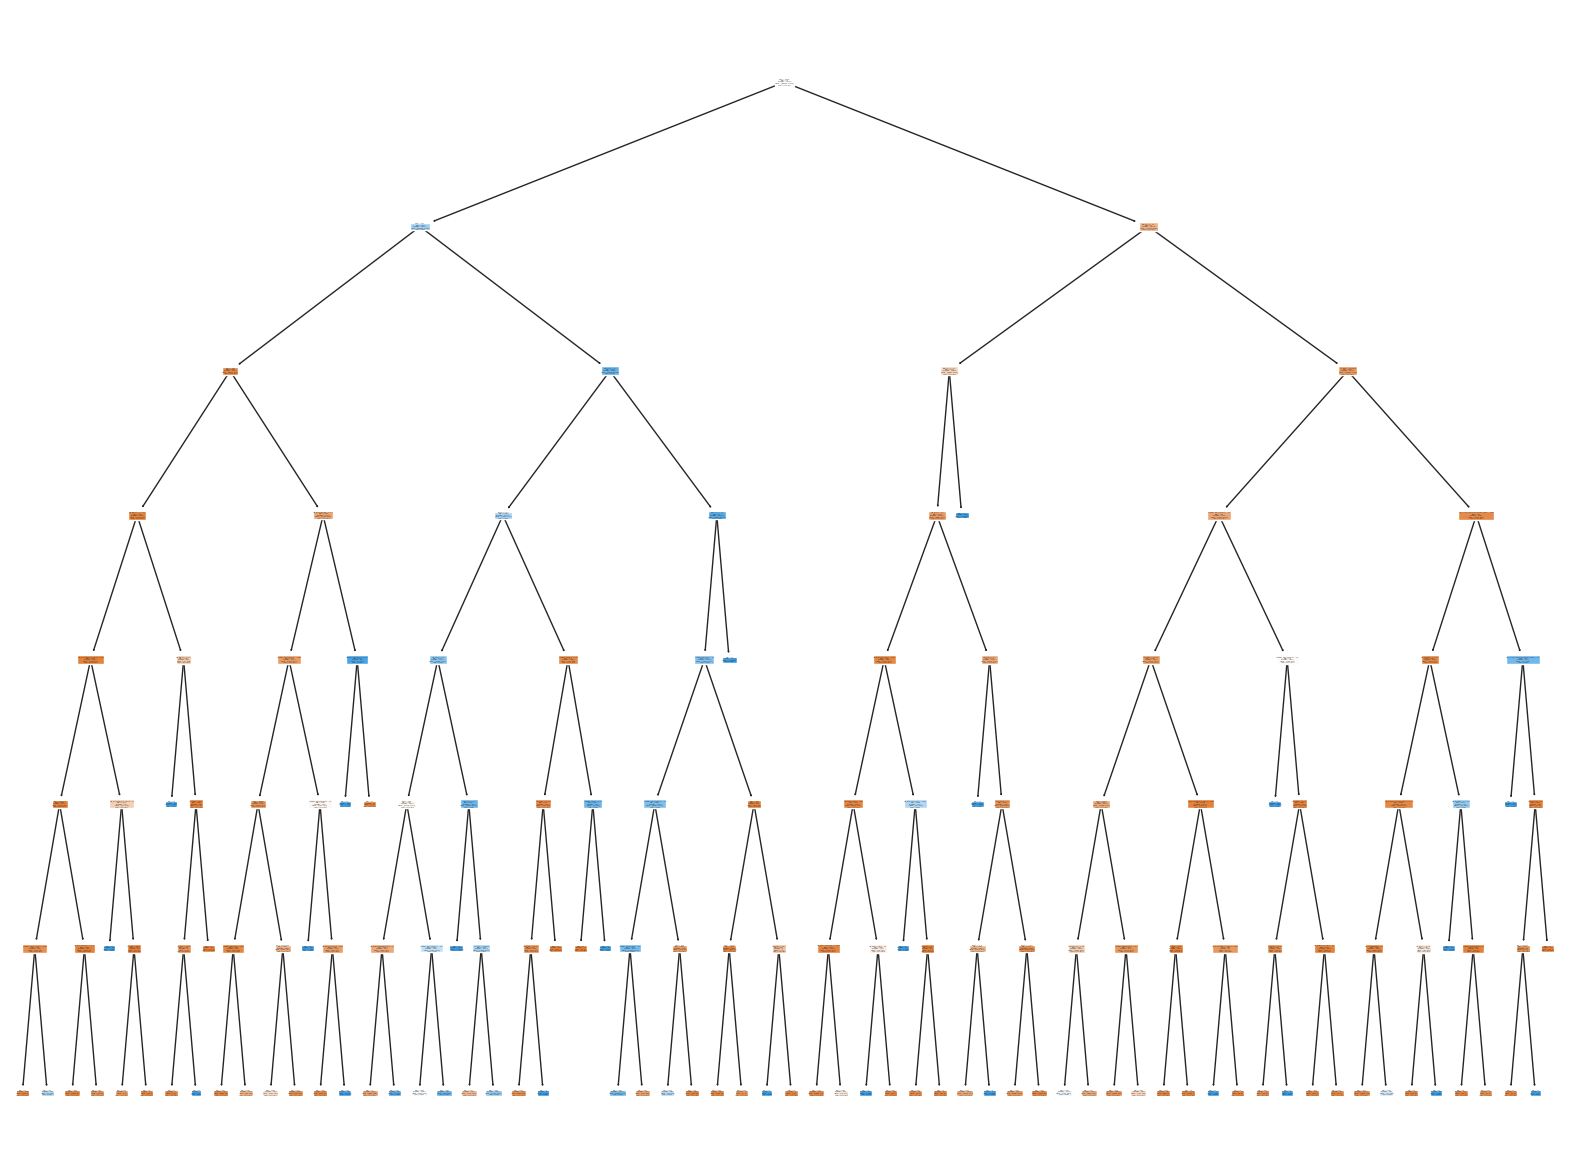

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train a decision tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=2)
best_dt_classifier.fit(x_train_selected, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 15))
plot_tree(best_dt_classifier, filled=True, feature_names=selected_features, class_names=['Not Fraud', 'Fraud'])
plt.show()


In [ ]:
!pip install dtreeviz


In [ ]:
from dtreeviz.trees import dtreeviz

# Create a visualization of the decision tree
viz = dtreeviz(
    best_dt_classifier,        # Trained decision tree classifier
    x_train_selected,          # Training features (with selected features)
    y_train,                   # Training target labels
    feature_names=selected_features,  # Names of the selected features
    class_names=['Not Fraud', 'Fraud']  # Names of the target classes
)


ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (/usr/local/lib/python3.10/dist-packages/dtreeviz/trees.py)

In [ ]:
from sklearn.metrics import roc_auc_score, log_loss

# measures the performance of the model independently of the scale of predicted probabilities.
# Lower log loss values indicate better model performance.
log_loss(y_test, y_pred_best)


3.2324696411480276

In [ ]:
# roc auc score is insensitive to class imbalance
# ROC AUC score closer to 1 indicates that the classifier has excellent discriminatory power
#  provides a comprehensive assessment of a binary classification

roc_auc_score(y_test, y_pred_best)


0.9102914240510376

In [1]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Convert y_test to binary format
y_test_binary = label_binarize(y_test, classes=[0, 1, 2])

# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming there are 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_best[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['darkorange', 'blue', 'green']  # Assign colors for each class
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


NameError: name 'y_test' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(dt_classifier_selected, x_train_selected, y_train, cv=5)

# Print the cross-validated scores
print("Cross-validated scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validated scores: [0.99874645 0.99885687 0.99869449 0.99874645 0.99859707]
Mean accuracy: 0.9987282658820625


In [ ]:
'''# Save the trained model
import joblib
joblib.dump(best_dt_classifier, 'best_decision_tree_model.pkl')

# Later, when you want to make predictions
loaded_model = joblib.load('best_decision_tree_model.pkl')
predictions = loaded_model.predict(new_data)
